# Sukhbold 2015 Models

CSN neutrino models from the MPA Garching CCSN archive based on the paper by Sukhbold et al., 2015. The archive is available on
[their website](https://wwwmpa.mpa-garching.mpg.de/ccsnarchive/data/SEWBJ_2015/index.html), but the data are private and available only upon request.
Note these are the results using the PROMETHEUS-VERTEX code https://ui.adsabs.harvard.edu/abs/2002A%26A...396..361R/abstract.
The four models are also described in Appendix C of this paper https://arxiv.org/abs/2010.04728

The citation is: *Core-Collapse Supernovae from 9 to 120 Solar Masses Based on Neutrino-powered Explosions*, Tuguldur Sukhbold, T. Ertl, S. E. Woosley, Justin M. Brown, H.-T. Janka, [Astrophys. J. 821 (2016)
38](http://dx.doi.org/10.3847/0004-637X/821/1/38), [arXiv:1510.04643](http://arxiv.org/abs/1510.04643).

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 

from snewpy.neutrino import Flavor, MassHierarchy
from snewpy.models import Sukhbold_2015
from snewpy.flavor_transformation import NoTransformation, AdiabaticMSW, ThreeFlavorDecoherence

In [2]:
mpl.rc('font', size=16)

In [3]:
def plot_luminosity(model):
    fig, ax = plt.subplots(1, figsize=(8,6))
    for flavor in Flavor:

        ax.plot(model.time, model.luminosity[flavor]/1e51, # Report luminosity in units foe/s
                label=flavor.to_tex(),
                color = 'C0' if flavor.is_electron else 'C1',
                ls = '-' if flavor.is_neutrino else ':',
                lw = 2 )

    ax.set(xlim=(-0.05, 0.5),
           xlabel=r'$t-t_{\rm bounce}$ [s]',
           ylabel=r'luminosity [foe s$^{-1}$]',
           title=model.fitsfile)
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=18)

    fig.tight_layout()
    return fig

## SFHo EOS: 9.6 $M_\odot$

In [4]:
ifile = '../../models/Sukhbold_2015/sukhbold-SFHo-z9.6.fits'
model = Sukhbold_2015(ifile)

In [5]:
model

**Sukhbold_2015 Model**: sukhbold-SFHo-z9.6.fits

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $9.6$ $\mathrm{M_{\odot}}$|
|EOS | SFHo|

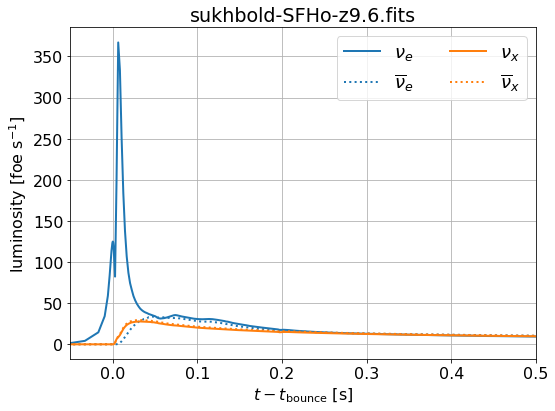

In [6]:
fig = plot_luminosity(model)

## LS220 EOS: 9.6 $M_\odot$

In [7]:
ifile = '../../models/Sukhbold_2015/sukhbold-LS220-z9.6.fits'
model = Sukhbold_2015(ifile)

In [8]:
model

**Sukhbold_2015 Model**: sukhbold-LS220-z9.6.fits

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $9.6$ $\mathrm{M_{\odot}}$|
|EOS | LS220|

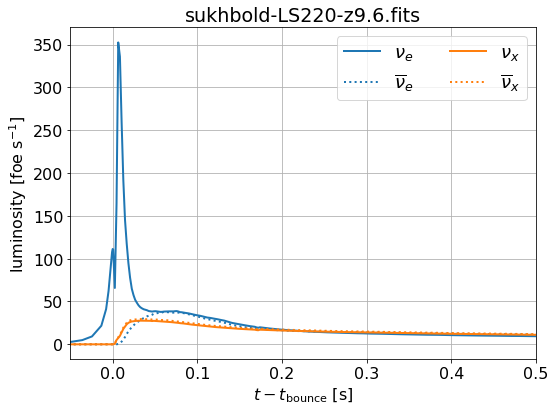

In [9]:
fig = plot_luminosity(model)

## SFHo EOS: 27.0 $M_\odot$

In [10]:
ifile = '../../models/Sukhbold_2015/sukhbold-SFHo-s27.0.fits'
model = Sukhbold_2015(ifile)

In [11]:
model

**Sukhbold_2015 Model**: sukhbold-SFHo-s27.0.fits

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $27$ $\mathrm{M_{\odot}}$|
|EOS | SFHo|

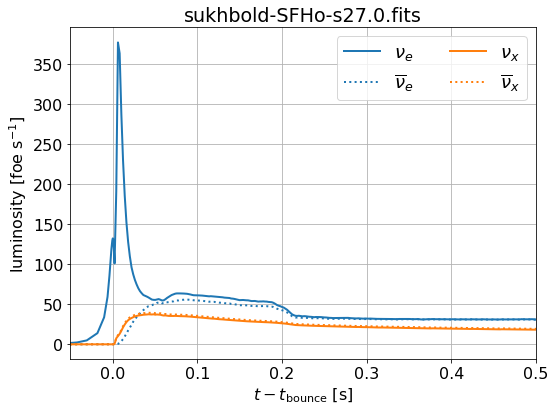

In [12]:
fig = plot_luminosity(model)

## LS220 EOS: 27 $M_\odot$

In [13]:
ifile = '../../models/Sukhbold_2015/sukhbold-LS220-s27.0.fits'
model = Sukhbold_2015(ifile)

In [14]:
model

**Sukhbold_2015 Model**: sukhbold-LS220-s27.0.fits

|Parameter|Value|
|:---------|:-----:|
|Progenitor mass | $27$ $\mathrm{M_{\odot}}$|
|EOS | LS220|

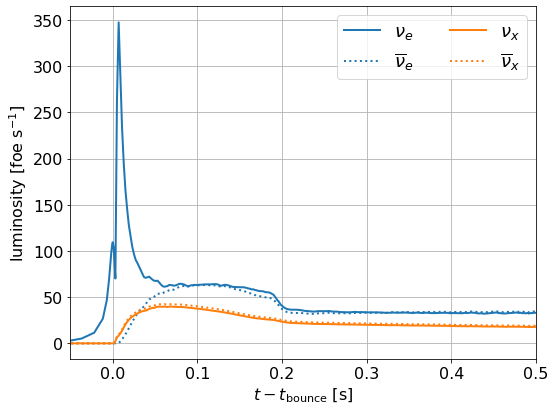

In [15]:
fig, ax = plt.subplots(1, figsize=(8,6))
for flavor in Flavor:

    ax.plot(model.time, model.luminosity[flavor]/1e51, # Report luminosity in units foe/s
            label=flavor.to_tex(),
            color = 'C0' if flavor.is_electron else 'C1',
            ls = '-' if flavor.is_neutrino else ':',
            lw = 2 )

ax.set(xlim=(-0.05, 0.5),
       xlabel=r'$t-t_{\rm bounce}$ [s]',
       ylabel=r'luminosity [foe s$^{-1}$]')
ax.grid()
ax.legend(loc='upper right', ncol=2, fontsize=18)

fig.tight_layout();

## Initial and Oscillated Spectra

Plot the neutrino spectra at the source and after the requested flavor transformation has been applied.

### Adiabatic MSW Flavor Transformation: Normal mass ordering

In [16]:
# Adiabatic MSW effect. NMO is used by default.
xform_nmo = AdiabaticMSW()

# Energy array and time to compute spectra.
# Note that any convenient units can be used and the calculation will remain internally consistent.
E = np.linspace(0,100,201) * u.MeV
t = 50*u.ms

ispec = model.get_initialspectra(t, E)
ospec_nmo = model.get_transformed_spectra(t, E, xform_nmo)

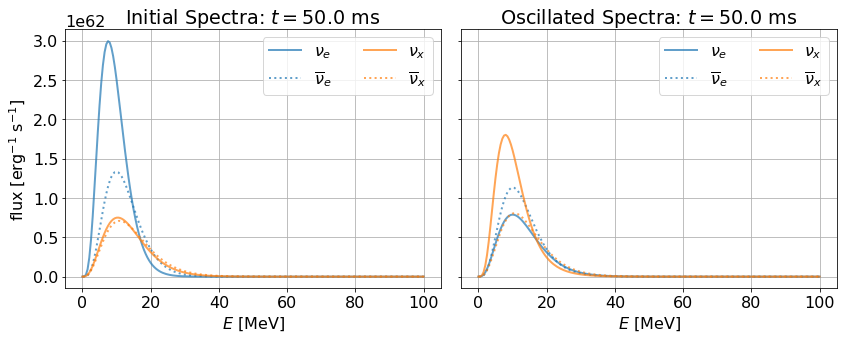

In [17]:
fig, axes = plt.subplots(1,2, figsize=(12,5), sharex=True, sharey=True, tight_layout=True)

for i, spec in enumerate([ispec, ospec_nmo]):
    ax = axes[i]
    for flavor in Flavor:
        ax.plot(E, spec[flavor],
                label=flavor.to_tex(),
                color='C0' if flavor.is_electron else 'C1',
                ls='-' if flavor.is_neutrino else ':', lw=2,
                alpha=0.7)

    ax.set(xlabel=r'$E$ [{}]'.format(E.unit),
           title='Initial Spectra: $t = ${:.1f}'.format(t) if i==0 else 'Oscillated Spectra: $t = ${:.1f}'.format(t))
    ax.grid()
    ax.legend(loc='upper right', ncol=2, fontsize=16)

ax = axes[0]
ax.set(ylabel=r'flux [erg$^{-1}$ s$^{-1}$]')

fig.tight_layout();